<a href="https://colab.research.google.com/github/shreyasparaj/digit_recognition-/blob/main/DIGIT_RECO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
#Load the training and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display the shape of the dataset
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Training Data Shape: (42000, 785)
Test Data Shape: (28000, 784)


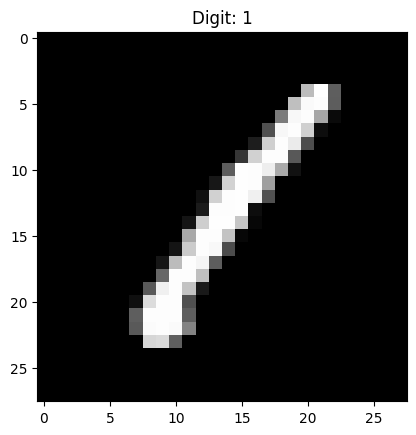

In [ ]:
# Visualize a few pixels of a sample image
sample_image = train_data.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(sample_image, cmap="gray")
plt.title(f"Digit: {train_data.iloc[0, 0]}")
plt.show()

In [ ]:
#  Split data into features (X) and labels (y)
X = train_data.drop("label", axis=1)
y = train_data["label"]

In [ ]:
# Split training data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print shapes of training and validation sets
print("Shapes after splitting:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

Shapes after splitting:
X_train shape: (33600, 784)
X_val shape: (8400, 784)
y_train shape: (33600,)
y_val shape: (8400,)


In [ ]:
# Preprocess data - Standardize pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
# One-hot encode labels
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

In [ ]:
# Define the Sequential model with multiple dense layers and dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))  # Layer 1
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))  # Layer 2
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))  # Layer 3
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  # Layer 4
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
# Plotting metrics during training
history = model.fit(X_train_scaled, y_train_one_hot, validation_data=(X_val_scaled, y_val_one_hot),
                    epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/50
1050/1050 [==============================] - 18s 14ms/step - loss: 0.5527 - accuracy: 0.8414 - val_loss: 0.2322 - val_accuracy: 0.9338
Epoch 2/50
1050/1050 [==============================] - 16s 15ms/step - loss: 0.2832 - accuracy: 0.9251 - val_loss: 0.1708 - val_accuracy: 0.9502
Epoch 3/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2246 - accuracy: 0.9404 - val_loss: 0.1534 - val_accuracy: 0.9560
Epoch 4/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1919 - accuracy: 0.9504 - val_loss: 0.1659 - val_accuracy: 0.9556
Epoch 5/50
1050/1050 [==============================] - 13s 13ms/step - loss: 0.1644 - accuracy: 0.9575 - val_loss: 0.1590 - val_accuracy: 0.9600
Epoch 6/50
1050/1050 [==============================] - 14s 13ms/step - loss: 0.1570 - accuracy: 0.9586 - val_loss: 0.1492 - val_accuracy: 0.9610
Epoch 7/50
1050/1050 [==============================] - 17s 16ms/step - loss: 0.1361 - accuracy: 0.9628 - val_loss: 0.1535 -

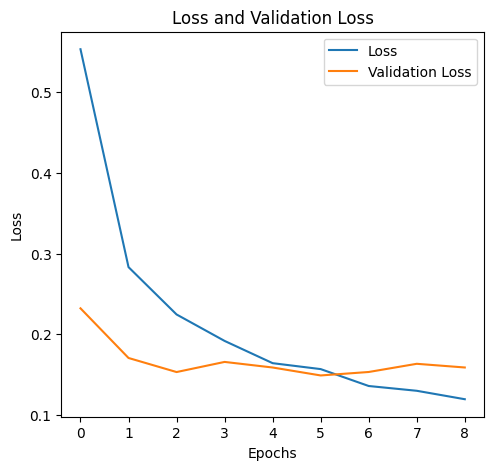

In [ ]:
# Plot loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


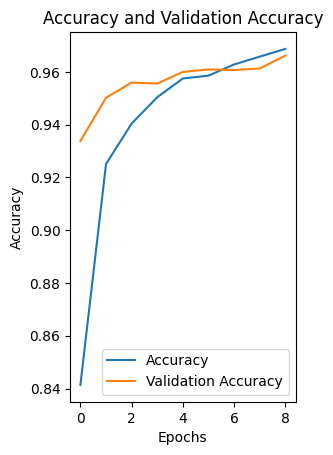

In [ ]:
# Plot accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Print best validation loss and best validation accuracy
best_val_loss = min(history.history['val_loss'])
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best Validation Loss: {best_val_loss:.4f}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Best Validation Loss: 0.1492
Best Validation Accuracy: 0.9662


In [ ]:
# Generate predictions on the training set
train_preds_dense = model.predict(X_train_scaled)

1050/1050 [==============================] - 7s 6ms/step


In [ ]:
# Generate predictions on the validation set
val_preds_dense = model.predict(X_val_scaled)


263/263 [==============================] - 2s 6ms/step


In [ ]:
# Print an example prediction and the corresponding true label
print("Example Prediction:")
print("Predicted Probabilities:", train_preds_dense[0])
print("Predicted Class:", np.argmax(train_preds_dense[0]))
print("True Label (One-Hot Encoded):", y_train_one_hot[0])
print("True Class:", np.argmax(y_train_one_hot[0]))

Example Prediction:
Predicted Probabilities: [3.8956776e-05 3.1027253e-07 6.0352340e-05 2.8675968e-08 1.0144216e-04
 3.3547581e-06 9.9978852e-01 2.8019670e-07 6.8508630e-06 8.0736520e-08]
Predicted Class: 6
True Label (One-Hot Encoded): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
True Class: 6


In [ ]:
# Extract predicted classes
train_preds_dense_class = np.argmax(train_preds_dense, axis=1)
val_preds_dense_class = np.argmax(val_preds_dense, axis=1)

In [ ]:
# Generate confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, val_preds_dense_class)
print("Confusion Matrix (Validation Set):")
print(conf_matrix_val)

Confusion Matrix (Validation Set):
[[807   0   0   2   0   2   4   1   0   0]
 [  2 896   3   0   1   0   0   5   2   0]
 [  6   7 815   2   5   0   3   3   3   2]
 [  5   5  15 878   0  11   0   4  13   6]
 [  6   1   2   0 800   3   7   2   1  17]
 [  2   2   1  10   0 667   6   1   8   5]
 [  9   2   1   1   0   5 763   0   4   0]
 [  0   1   5   4   3   3   0 871   0   6]
 [  1  10   2   9   6   5   1   1 798   2]
 [  2   1   0   7  10   4   0  25  12 777]]


In [ ]:
# Print classification report for training set
print("Classification Report (Training Set):")
print(classification_report(y_train, train_preds_dense_class))

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3316
           1       0.98      0.99      0.99      3775
           2       0.97      0.99      0.98      3331
           3       0.98      0.97      0.97      3414
           4       0.99      0.98      0.98      3233
           5       0.99      0.97      0.98      3093
           6       1.00      0.98      0.99      3352
           7       0.97      0.98      0.98      3508
           8       0.97      0.97      0.97      3228
           9       0.98      0.95      0.97      3350

    accuracy                           0.98     33600
   macro avg       0.98      0.98      0.98     33600
weighted avg       0.98      0.98      0.98     33600



In [ ]:
# Print classification report for validation set
print("Classification Report (Validation Set):")
print(classification_report(y_val, val_preds_dense_class))

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       816
           1       0.97      0.99      0.98       909
           2       0.97      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.97      0.95      0.96       839
           5       0.95      0.95      0.95       702
           6       0.97      0.97      0.97       785
           7       0.95      0.98      0.96       893
           8       0.95      0.96      0.95       835
           9       0.95      0.93      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
# Real test dataset
print("Real Test Dataset:")
print(test_data.head())

Real Test Dataset:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0    

In [ ]:
# Preprocess real test data
X_test_scaled = scaler.transform(test_data)


In [ ]:
# Generate predictions on the real test set
predictions = model.predict(X_test_scaled)

875/875 [==============================] - 5s 6ms/step


In [ ]:
# Extract predicted classes
predictions_class = np.argmax(predictions, axis=1)

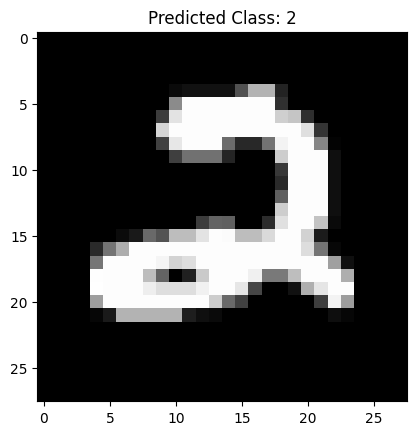

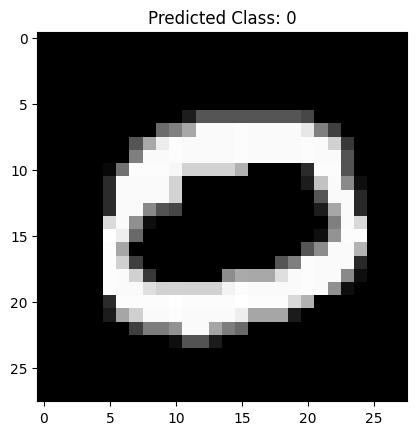

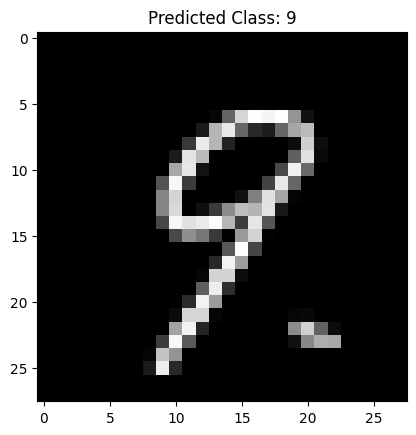

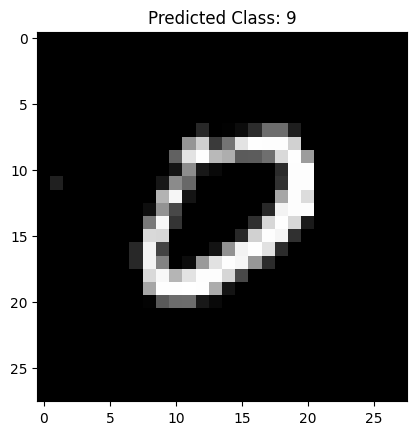

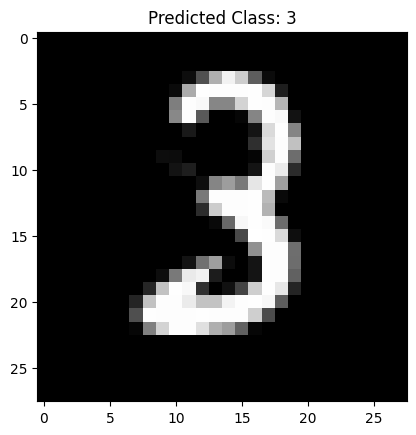

In [ ]:
# Visualize a few predictions on the real test set
num_samples_to_visualize = 5
for i in range(num_samples_to_visualize):
    sample_image = test_data.iloc[i, :].values.reshape(28, 28)
    plt.imshow(sample_image, cmap="gray")
    plt.title(f"Predicted Class: {predictions_class[i]}")
    plt.show()

In [ ]:
# Prepare submission file
submission_df = pd.DataFrame({'ImageId': range(1, len(predictions_class) + 1), 'Label': predictions_class})
submission_df.to_csv('submission.csv', index=False)

In [ ]:
# Save the model
model.save('trained_model.h5')